> # Prediction using KNN model after standardization and finding best K value.

## Adding Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 2160x1080 with 0 Axes>

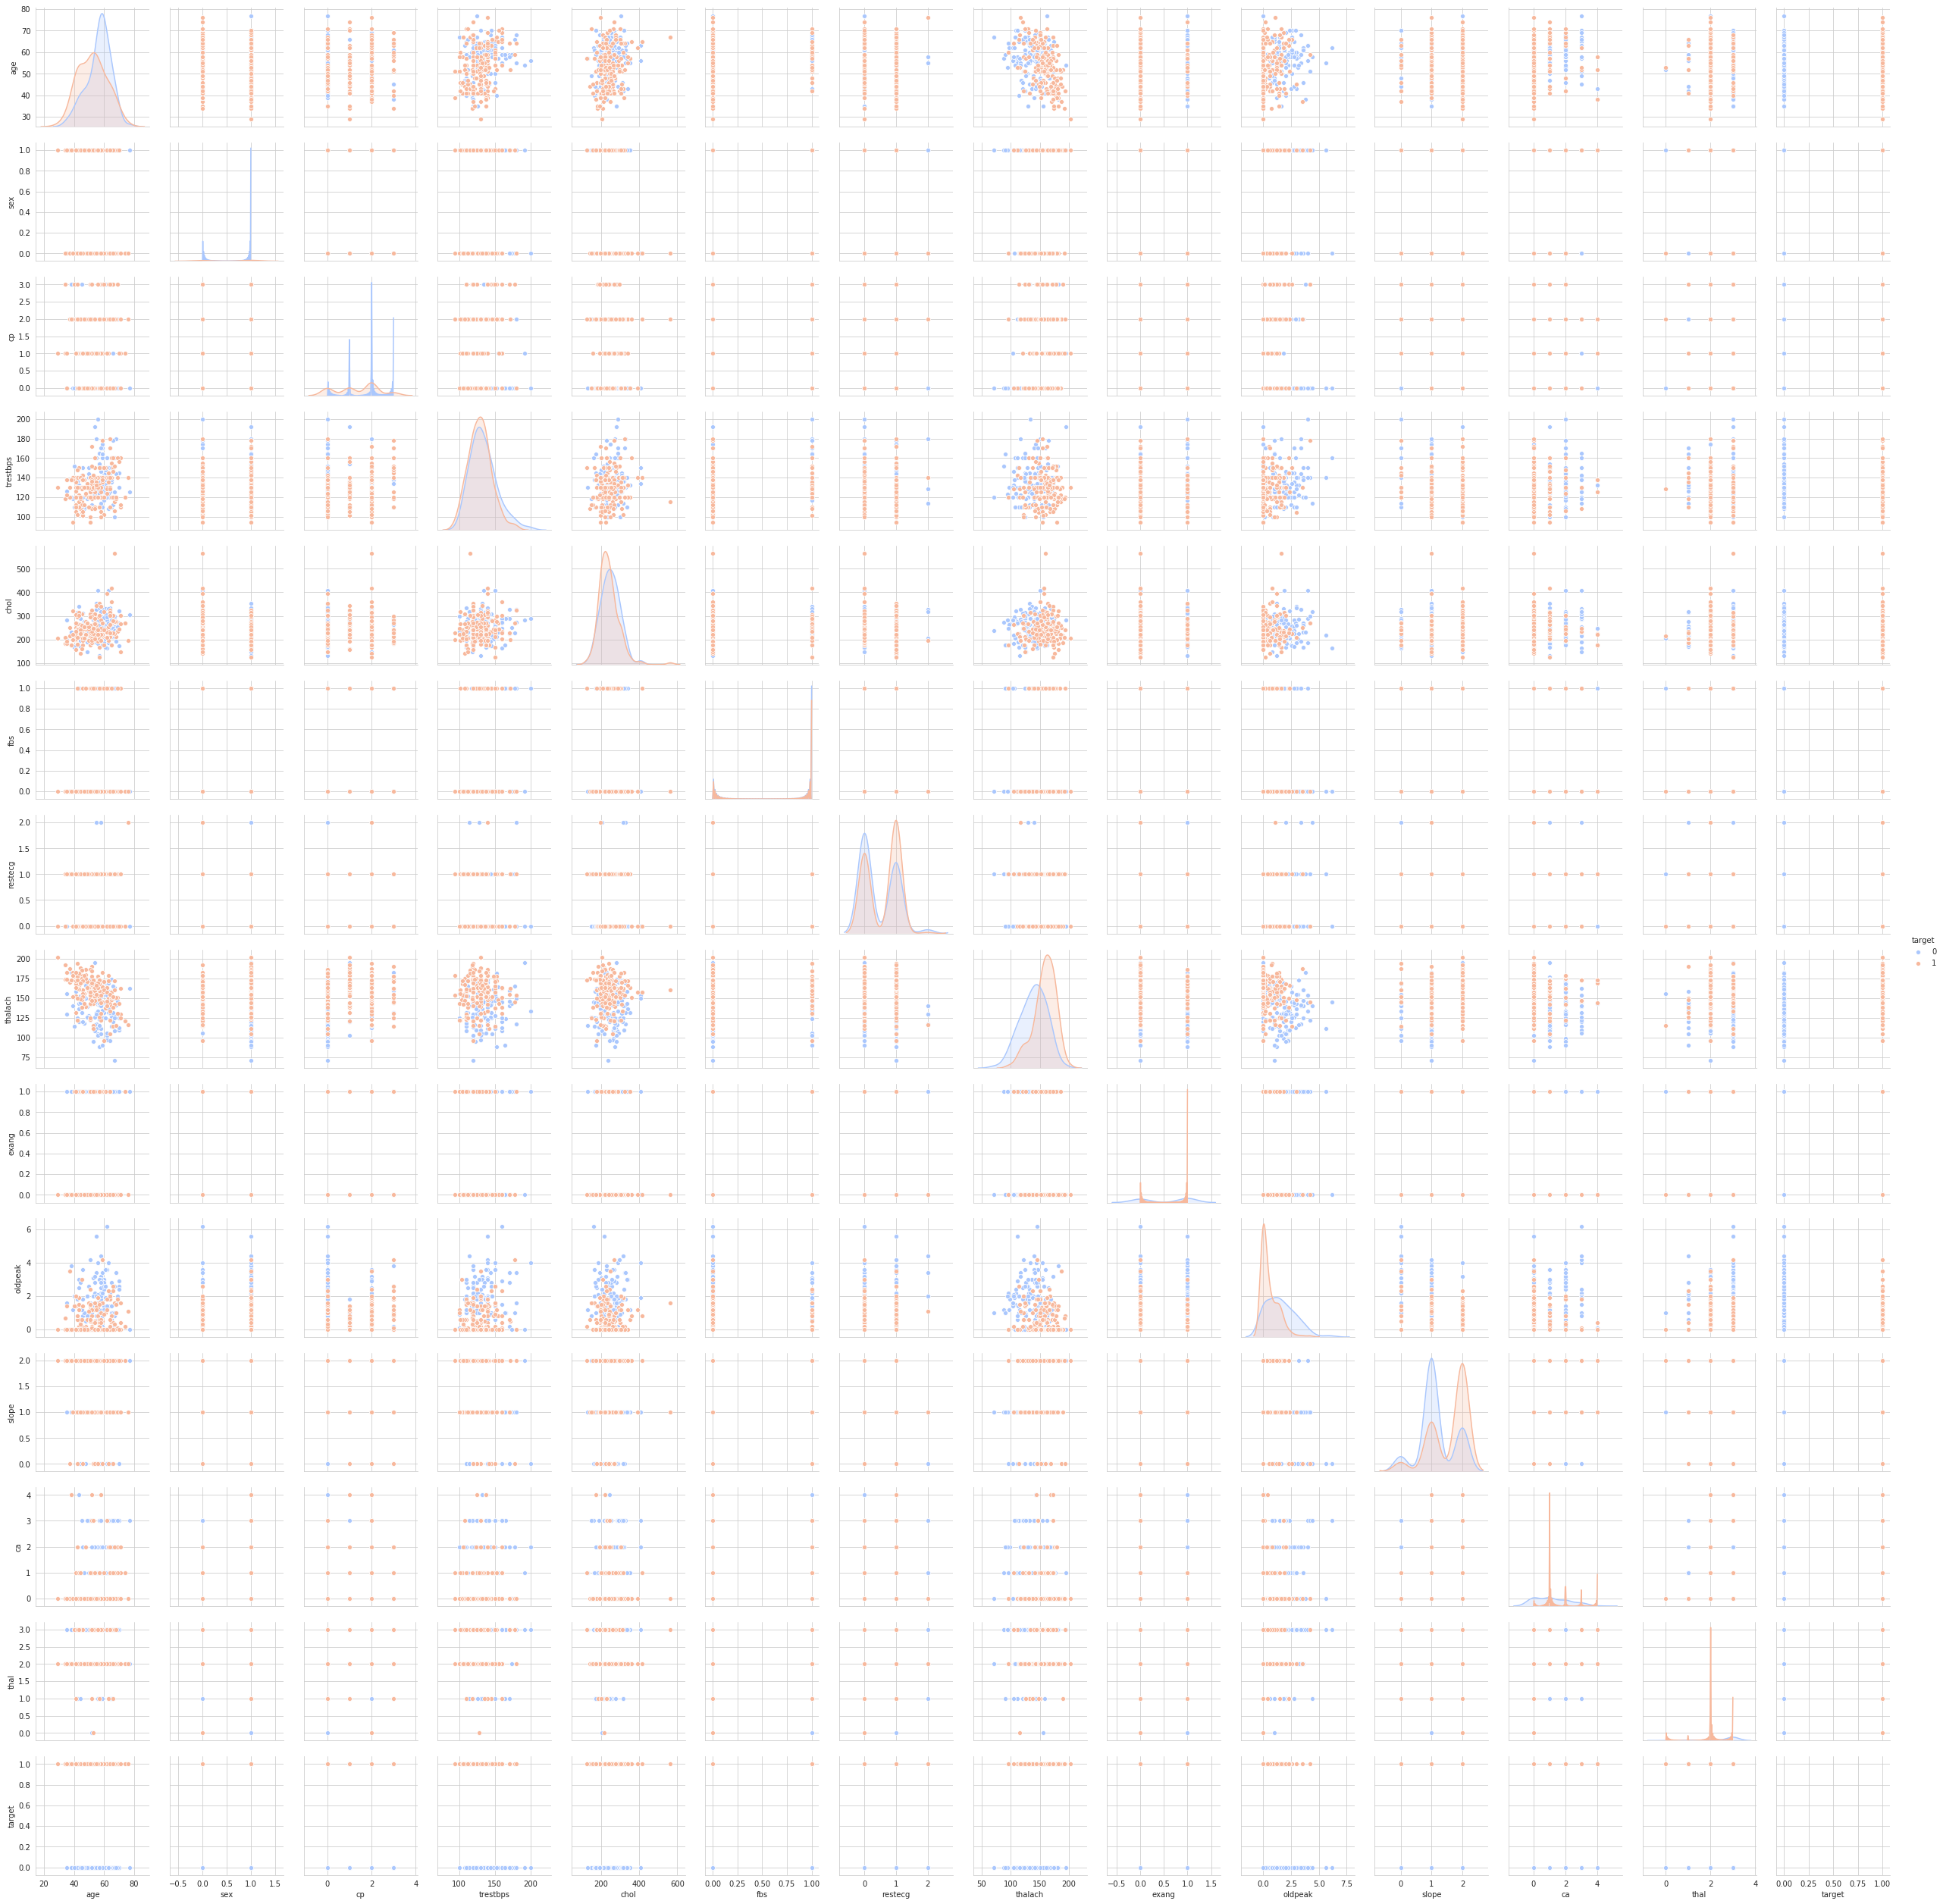

In [5]:
sb.set_style('whitegrid')
plt.figure(figsize=(30,15))
sb.pairplot(df, hue='target', palette='coolwarm')

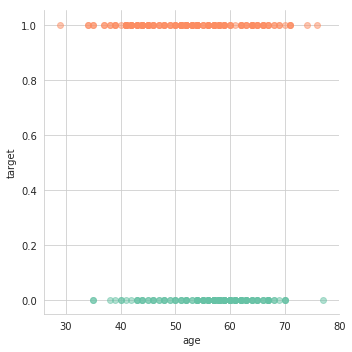

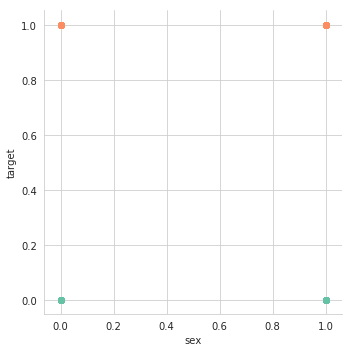

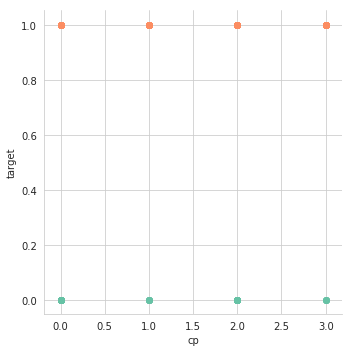

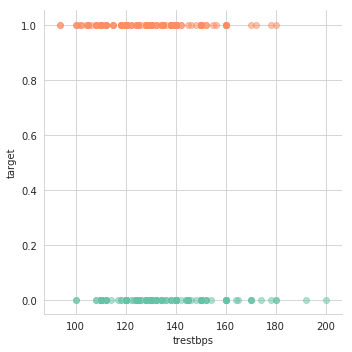

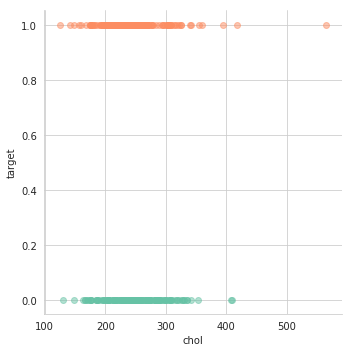

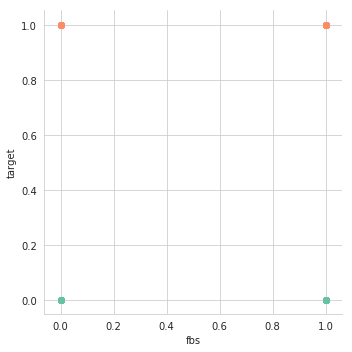

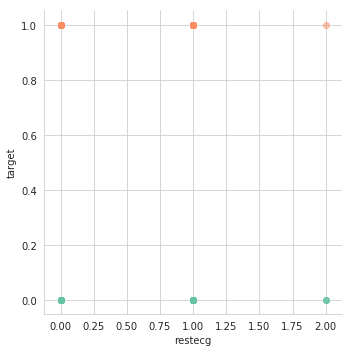

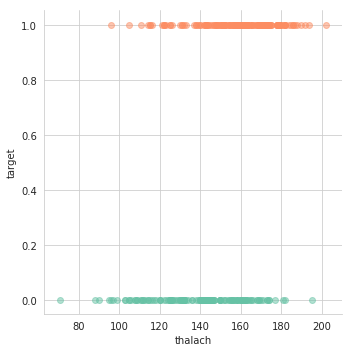

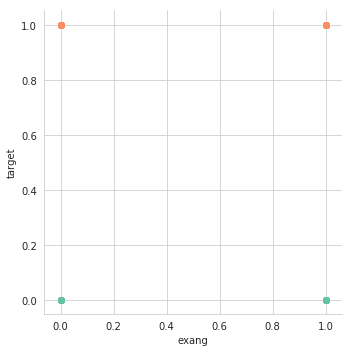

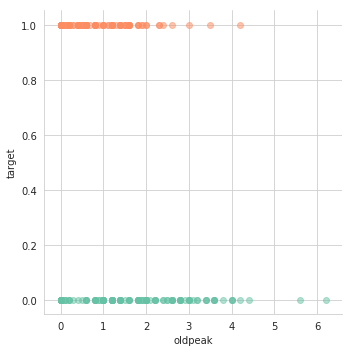

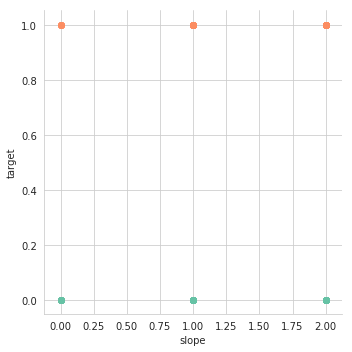

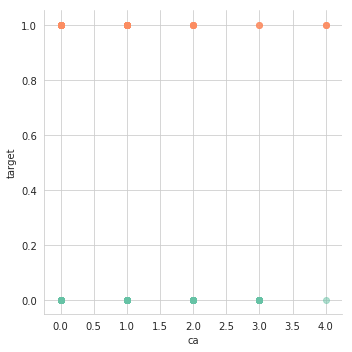

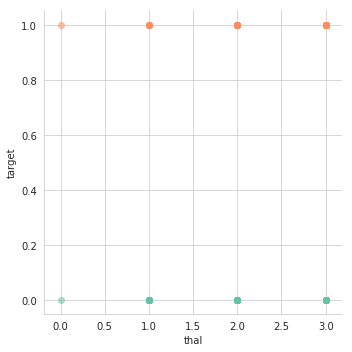

In [6]:
for col in df.drop(['target'], axis=1).columns:
    sb.lmplot(data=df, x=col, y='target', fit_reg=False, hue='target',palette='Set2', legend=False, scatter_kws={'alpha':0.5})

## Loading Libraries required for Prediction

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Applying Standardization and Spliting data into training data and test data

In [8]:
X = df.drop(['target'], axis=1)
y = df['target']

from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
X = stds.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=101)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Searching for best K value to use for prediction.

In [9]:
def knnprediction(k, Xtrain, ytrain, Xtest):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xtrain, ytrain)
    pred = knn.predict(Xtest)
    return pred

In [10]:
error_mean = []
for k in range(1, 41):
    pred_i = knnprediction(k, Xtrain, ytrain, Xtest)
    error_mean.append(np.mean(pred_i != ytest))

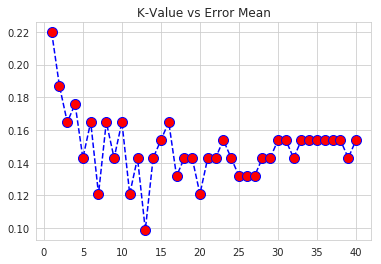

In [11]:
plt.plot(range(1,41), error_mean, linestyle='dashed', color='b', marker='o', markerfacecolor='r', markersize=10)
plt.title('K-Value vs Error Mean')
plt.show()

### As k = 14 yields minimum error mean, so we are going to use k=24 for predicting target field.

## Applying best k value i.e. 14 for prediction

In [12]:
pred = knnprediction(14, Xtrain, ytrain, Xtest)

## Showing evaluation of prediction.

In [13]:
cm = confusion_matrix(ytest, pred)
print('True Negative : ' + str(cm[0][0]))
print('False Positive : ' + str(cm[0][1]))
print('False Neagtive  : ' + str(cm[1][0]))
print('True Positive : ' + str(cm[1][1]))

True Negative : 37
False Positive : 7
False Neagtive  : 6
True Positive : 41


In [14]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        44
           1       0.85      0.87      0.86        47

   micro avg       0.86      0.86      0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



# Here we can see that precision, recall and f1-score is > 0.85 so we can consider that the prediction is pretty accurate. 